In [203]:
import pandas as pd
import warnings as wr
wr.filterwarnings('ignore')

In [205]:
df = pd.read_csv('weight-height.csv')
df.head()

,Gender,Height,Weight
0,Male,73.847017,241.893563
1,Male,68.781904,162.310473
2,Male,74.110105,212.740856
3,Male,71.730978,220.042470
4,Male,69.881796,206.349801


In [207]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

In [209]:
df.Gender = le.fit_transform(df[['Gender']])

In [211]:
df.head()

,Gender,Height,Weight
0,1,73.847017,241.893563
1,1,68.781904,162.310473
2,1,74.110105,212.740856
3,1,71.730978,220.042470
4,1,69.881796,206.349801


In [213]:
df.tail()

,Gender,Height,Weight
8550,0,60.483946,110.565497
8551,0,63.423372,129.921671
8552,0,65.584057,155.942671
8553,0,67.429971,151.678405
8554,0,60.921791,131.253738


In [215]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8555 entries, 0 to 8554
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Gender  8555 non-null   int32  
 1   Height  8555 non-null   float64
 2   Weight  8555 non-null   float64
dtypes: float64(2), int32(1)
memory usage: 167.2 KB


In [217]:
df.shape

(8555, 3)

In [219]:
df.corr

<bound method DataFrame.corr of       Gender     Height      Weight
0          1  73.847017  241.893563
1          1  68.781904  162.310473
2          1  74.110105  212.740856
3          1  71.730978  220.042470
4          1  69.881796  206.349801
...      ...        ...         ...
8550       0  60.483946  110.565497
8551       0  63.423372  129.921671
8552       0  65.584057  155.942671
8553       0  67.429971  151.678405
8554       0  60.921791  131.253738

[8555 rows x 3 columns]>

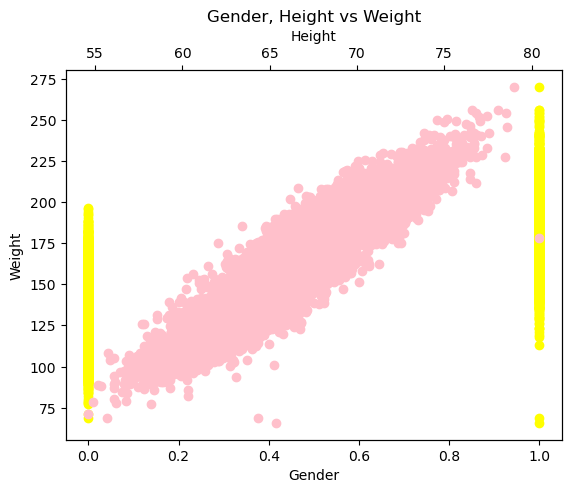

In [221]:
from matplotlib import pyplot as plt
fig, ax1 = plt.subplots()
ax1.scatter(df[['Gender']], df[['Weight']], color='yellow', label='Gender VS Weight')
ax1.set_xlabel('Gender')
ax1.set_ylabel('Weight')


ax2 = ax1.twiny()
ax2.scatter(df[['Height']], df[['Weight']], color='pink', label='Height vs Weight')
ax2.set_xlabel('Height')
plt.title("Gender, Height vs Weight")
plt.show()

In [223]:
import seaborn as sns

In [225]:
import seaborn as sns

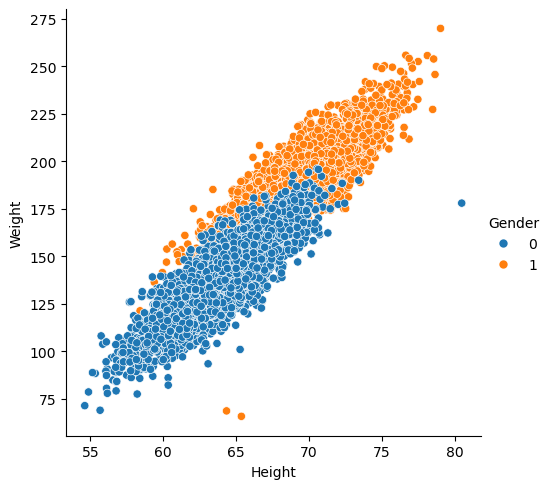

In [227]:
sns.relplot(x=df.Height,y=df.Weight,data=df,hue='Gender')

In [229]:
df[['Gender','Height']].head()

,Gender,Height
0,1,73.847017
1,1,68.781904
2,1,74.110105
3,1,71.730978
4,1,69.881796


In [231]:
df[['Weight']].head()

,Weight
0,241.893563
1,162.310473
2,212.740856
3,220.042470
4,206.349801


In [233]:
x=df.drop('Weight',axis=1)
x.head()

,Gender,Height
0,1,73.847017
1,1,68.781904
2,1,74.110105
3,1,71.730978
4,1,69.881796


In [235]:
y=df.drop(['Gender','Height'],axis=1)
y.head()

,Weight
0,241.893563
1,162.310473
2,212.740856
3,220.042470
4,206.349801


In [237]:
from sklearn.model_selection import train_test_split as tts

In [239]:
xtrain, xtest, ytrain, ytest = tts(x, y, test_size=.30, random_state=0)

In [241]:
xtrain.shape

(5988, 2)

In [243]:
ytrain.shape

(5988, 1)

In [245]:
xtrain.head()

,Gender,Height
3197,1,69.689848
4394,1,66.299441
7711,0,63.261527
7019,0,62.035319
898,1,67.272171


In [247]:
xtrain.tail()

,Gender,Height
4373,1,69.845422
7891,0,65.769858
4859,1,66.730755
3264,1,67.467086
2732,1,70.597025


In [249]:
ytrain.head()

,Weight
3197,186.377448
4394,159.235988
7711,126.426793
7019,119.418135
898,187.363366


In [251]:
ytrain.tail()

,Weight
4373,178.674044
7891,147.733361
4859,174.156893
3264,162.475957
2732,188.450674


In [253]:
xtest.shape

(2567, 2)

In [255]:
ytest.shape

(2567, 1)

In [257]:
xtest.head()

,Gender,Height
541,1,63.867921
3209,1,68.688931
7598,0,65.865244
5170,0,66.259558
2423,1,67.290776


In [259]:
xtest.tail()

,Gender,Height
2266,1,71.170612
8425,0,62.615281
7358,0,67.679872
4827,1,65.673643
5034,0,63.939973


In [261]:
ytest.head()

,Weight
541,174.473363
3209,178.507500
7598,155.248900
5170,138.839940
2423,154.718344


# Least Squared Linear Regression

In [264]:
from sklearn.linear_model import LinearRegression

In [266]:
reg=LinearRegression()

In [268]:
reg.fit(xtrain,ytrain)

LinearRegression()

In [270]:
reg.coef_

array([[19.67647385,  5.95976283]])

In [272]:
reg.intercept_

array([-244.11178083])

In [274]:
reg_y_pred=reg.predict(xtest)
reg_y_pred

array([[156.20235428],
       [184.93442898],
       [148.42945323],
       ...,
       [159.2442037 ],
       [166.96403181],
       [136.95529212]])

In [276]:
reg.score(xtrain,ytrain)

0.8988118427483529

In [278]:
reg.score(xtest,ytest)

0.9025307579174771

In [280]:
from sklearn.metrics import mean_squared_error

In [282]:
mse=mean_squared_error(ytest,reg_y_pred)
mse

102.30154155088874

# Regression Problem

In [285]:
from sklearn.neighbors import KNeighborsRegressor

In [291]:
knn_regressor = KNeighborsRegressor(n_neighbors=375)
knn_regressor.fit(xtrain, ytrain)

KNeighborsRegressor(n_neighbors=375)

In [293]:
knn_y_pred = knn_regressor.predict(xtest)
knn_y_pred

array([[147.47969738],
       [185.14515965],
       [148.34547575],
       ...,
       [165.17370595],
       [167.66042341],
       [137.73141718]])

In [295]:
knn_regressor.score(xtest,ytest)

0.8853073354533691

In [302]:
knn_regressor.score(xtrain,ytrain)

0.8846077989408211

In [304]:
mse=mean_squared_error(ytest,reg_y_pred)
mse

102.30154155088874

## Compare KNN & Linear Regression with the KNN Model and Linear regression

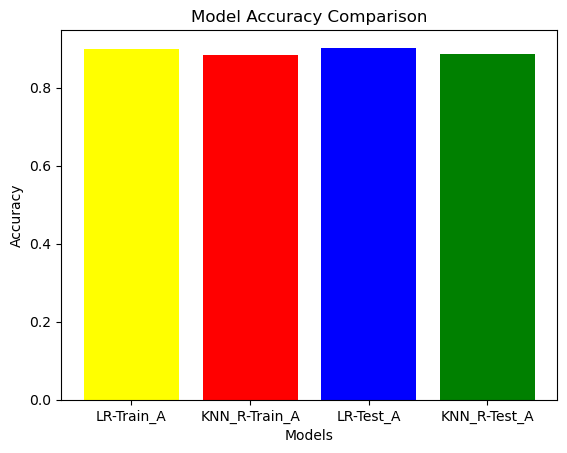

In [308]:
model_names = ['LR-Train_A', 'KNN_R-Train_A','LR-Test_A', 'KNN_R-Test_A']
accuracy_values = [reg.score(xtrain,ytrain), knn_regressor.score(xtrain,ytrain),reg.score(xtest,ytest), knn_regressor.score(xtest,ytest)]  
plt.bar(model_names, accuracy_values, color=['yellow','red','blue', 'green'])
plt.title('Model Accuracy Comparison')
plt.xlabel('Models')
plt.ylabel('Accuracy')
plt.show()

# Classification Problem

In [310]:
df.head()

,Gender,Height,Weight
0,1,73.847017,241.893563
1,1,68.781904,162.310473
2,1,74.110105,212.740856
3,1,71.730978,220.042470
4,1,69.881796,206.349801


In [312]:
df[['Gender']].head()

,Gender
0,1
1,1
2,1
3,1
4,1


In [314]:
df[['Height','Weight']].head()

,Height,Weight
0,73.847017,241.893563
1,68.781904,162.310473
2,74.110105,212.740856
3,71.730978,220.042470
4,69.881796,206.349801


In [316]:
x=df.drop('Gender',axis=1)
x.head()

,Height,Weight
0,73.847017,241.893563
1,68.781904,162.310473
2,74.110105,212.740856
3,71.730978,220.042470
4,69.881796,206.349801


In [318]:
y=df.drop(['Height','Weight'],axis=1)
y.head()

,Gender
0,1
1,1
2,1
3,1
4,1


In [320]:
from sklearn.model_selection import train_test_split

In [322]:
xtrain, xtest, ytrain, ytest = tts(x, y, test_size=.30, random_state=0)

In [324]:
x.head()

,Height,Weight
0,73.847017,241.893563
1,68.781904,162.310473
2,74.110105,212.740856
3,71.730978,220.042470
4,69.881796,206.349801


In [326]:
xtrain.shape

(5988, 2)

In [328]:
xtest.shape

(2567, 2)

In [330]:
ytrain.shape

(5988, 1)

In [332]:
ytest.shape

(2567, 1)

In [334]:
from sklearn.neighbors import KNeighborsClassifier

In [336]:
knn_regressor = KNeighborsRegressor(n_neighbors=87)
knn_regressor.fit(xtrain, ytrain)

KNeighborsRegressor(n_neighbors=87)

In [338]:
knn_y_pred = knn_regressor.predict(xtest)
knn_y_pred

array([[0.94252874],
       [0.90804598],
       [0.32183908],
       ...,
       [0.88505747],
       [0.89655172],
       [0.10344828]])

In [340]:
knn_regressor.score(xtrain,ytrain)

0.7488632402257752

In [342]:
knn_regressor.score(xtest,ytest)

0.7238031046017293